<a href="https://colab.research.google.com/github/lainIvakuraa/machineLearning/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [5]:
!pip install fastapi
!pip install kaleido
!pip install uvicorn
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='windows-1252')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [12]:
# Как много пустых ячейек в разных колонках
df.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [11]:
df = df.dropna()

In [ ]:
df.info()

<Axes: >

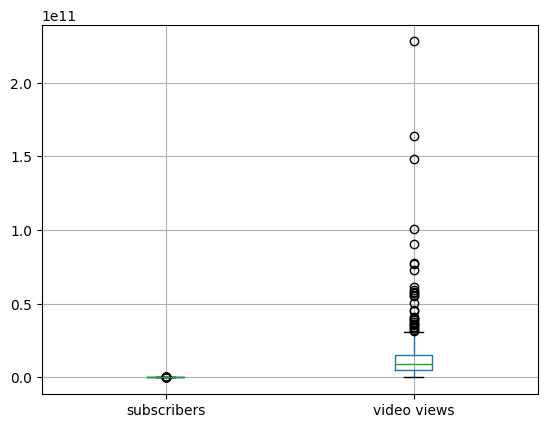

In [16]:
df.boxplot(column=['subscribers', 'video views'])

In [23]:
# Optimize dataframe
class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outliers_by_qvartil(self, column_name, column_name2): # метод из второй лабы
    quan25 = self.df[column_name].quantile(0.25)
    quan75 = self.df[column_name].quantile(0.75)
    quan25_col2 = self.df[column_name2].quantile(0.25)
    quan75_col2  = self.df[column_name2].quantile(0.75)
    quan_diff = quan75 - quan25
    quan_diff_col2 = quan75_col2 - quan25_col2
    left_border = quan25 - 1.5 * quan_diff
    left_border_col2 = quan25_col2 - 1.5 * quan_diff_col2
    right_border = quan75 + 1.5 * quan_diff
    right_border_col2 = quan75_col2 + 1.5 * quan_diff_col2
    return self.df[(self.df[column_name] >=left_border) & (self.df[column_name] <= right_border) & (self.df[column_name2] >=left_border_col2) & (self.df[column_name2] <= right_border_col2)]

<Axes: >

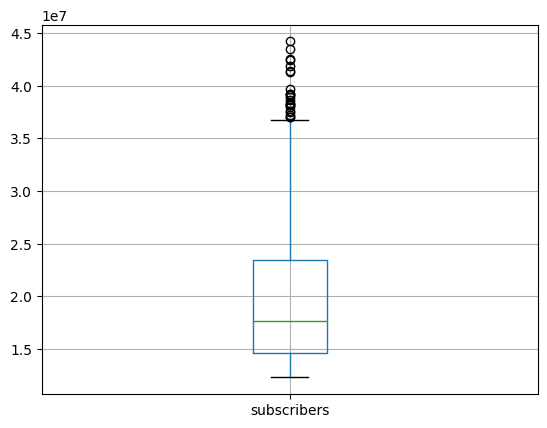

In [27]:
check_outlier_quantity = Outline(df)
df_outlier_malicAcid = check_outlier_quantity.delete_outliers_by_qvartil('video views', 'subscribers')


df_outlier_malicAcid.boxplot(column=['subscribers'])

<Axes: >

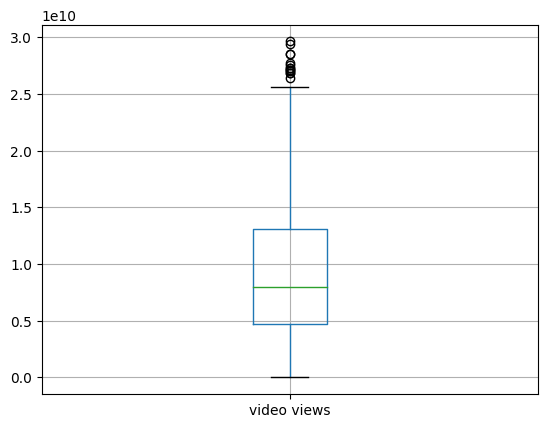

In [28]:
df_outlier_malicAcid.boxplot(column=['video views'])

<Axes: >

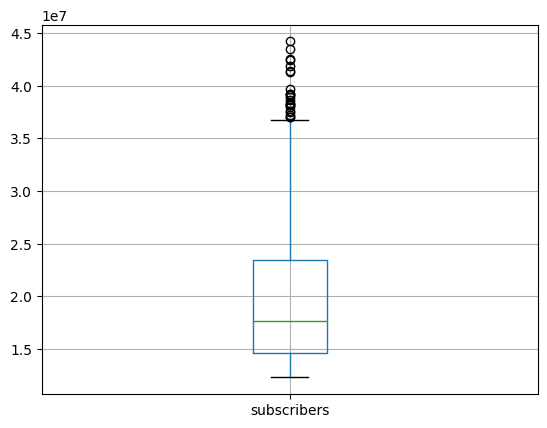

In [30]:
check_outlier_unitPrice_another = Outline(df_outlier_malicAcid) # Уже обрабатываем по другому датафрейму
df_clear = check_outlier_unitPrice_another.delete_outliers_by_qvartil('video views', 'subscribers')

df_outlier_malicAcid.boxplot(column=['subscribers'])

In [31]:
from sklearn.preprocessing import MinMaxScaler

num_features = df.select_dtypes(include=['float64']).columns

df_cluster = df_clear.copy()

scaler_minmax = MinMaxScaler() #
min_max_scal = scaler_minmax.fit_transform(df_clear[['subscribers', 'video views']])
df_cluster[['subscribers', 'video views']] = min_max_scal
df_cluster

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
97,98,Bruno Mars,1.000000,0.756741,Music,Bruno Mars,99,United States,US,Music,...,200000.0,2006.0,Sep,19.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
99,100,Ultra Bollywood,0.995902,0.611299,Trailers,Ultra Bollywood,9168,India,IN,Entertainment,...,200000.0,2009.0,Oct,21.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
101,102,YouTube,0.983607,0.117575,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
106,107,Saregama Music,0.950820,0.611451,Entertainment,Saregama Music,7566,India,IN,Music,...,900000.0,2013.0,Jan,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
107,108,IndiaTV,0.950820,0.628921,News & Politics,IndiaTV,273255,India,IN,News,...,600000.0,2006.0,Aug,26.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,0.004098,0.273101,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,0.000000,0.352617,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,0.000000,0.065388,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,0.000000,0.014610,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве (обработанный сет)')

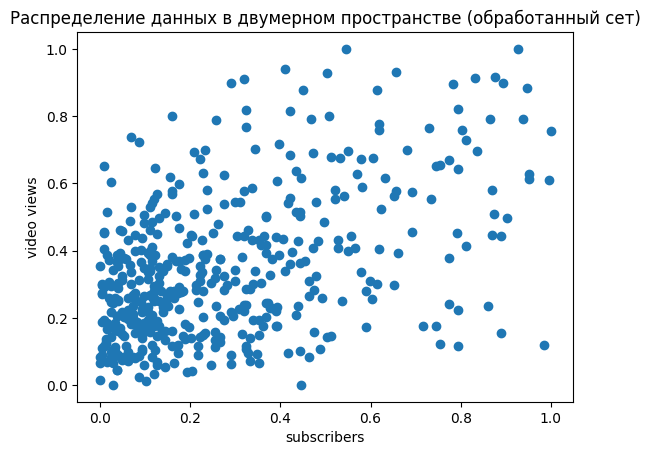

In [32]:
plt.scatter(df_cluster["subscribers"], df_cluster["video views"])
plt.xlabel('subscribers')
plt.ylabel('video views')
plt.title('Распределение данных в двумерном пространстве (обработанный сет)')

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

Оптимальное число кластеров 2, с баллом 526.2055621352014


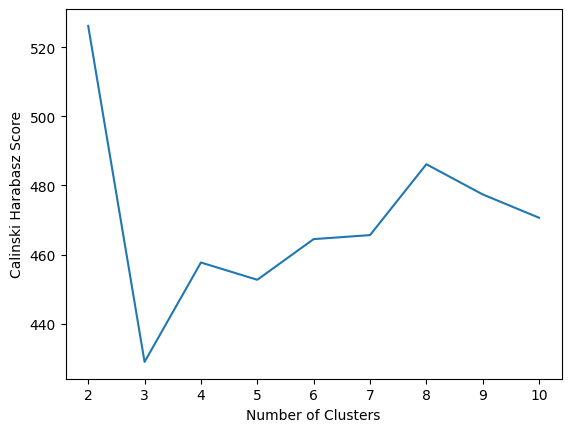

In [33]:
# Внутренняя метрика

from sklearn.metrics import calinski_harabasz_score

X = df_cluster[['subscribers','video views']]

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = calinski_harabasz_score(X, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Оптимальное число кластеров 7, с баллом 0.7983136783698725


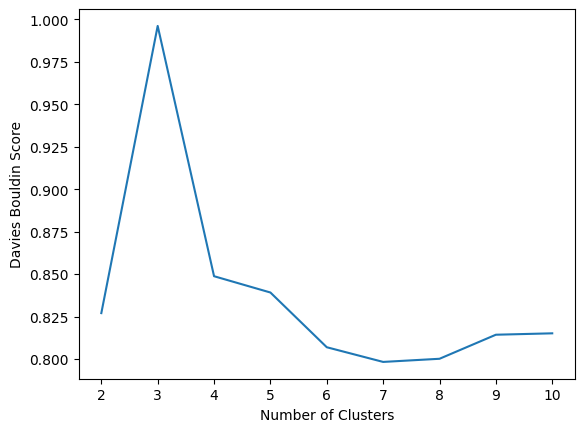

In [34]:
# Внутренняя метрика

from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

Оптимальное число кластеров 2, с баллом 0.512727603888848


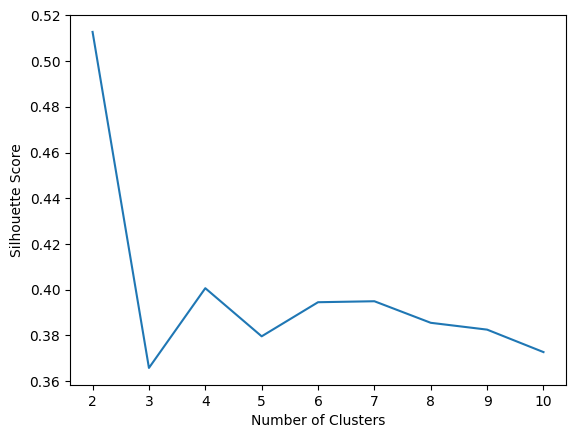

In [35]:
#Внешняя метрика

from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

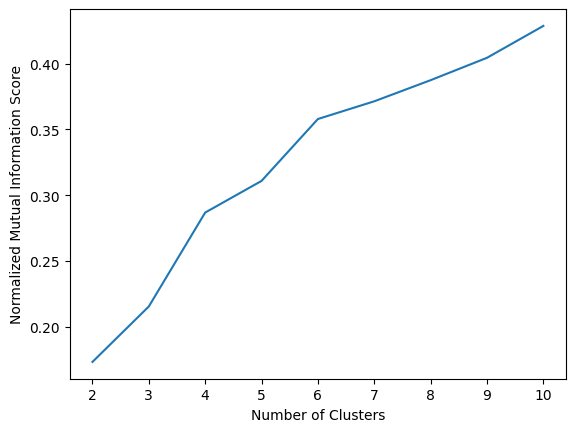

Оптимальное число кластеров 10, с баллом 0.428742178643611


In [36]:
#Внешняя метрика (из-за определния истинных меток)

from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df_cluster['subscribers'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


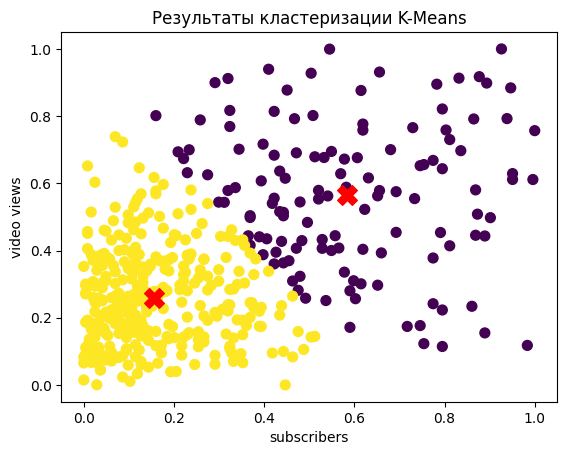

In [37]:
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.scatter(X["subscribers"], X["video views"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('subscribers')
plt.ylabel('video views')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

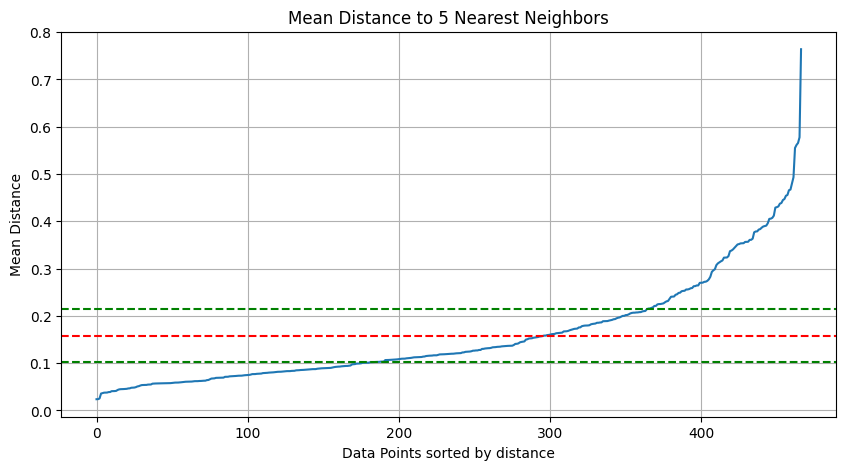

Оптимальный EPS = 0.15813541132803272


In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

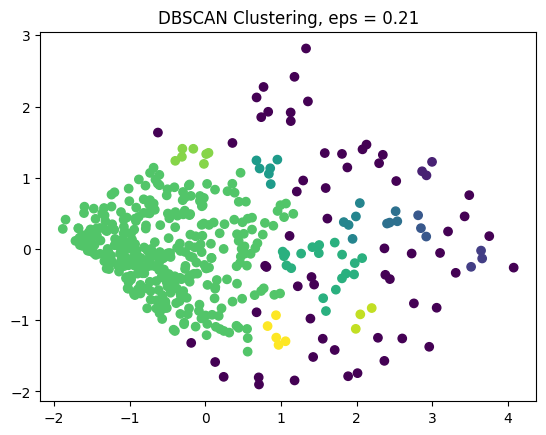

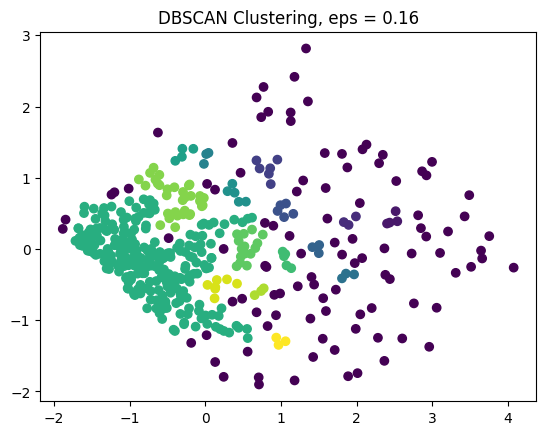

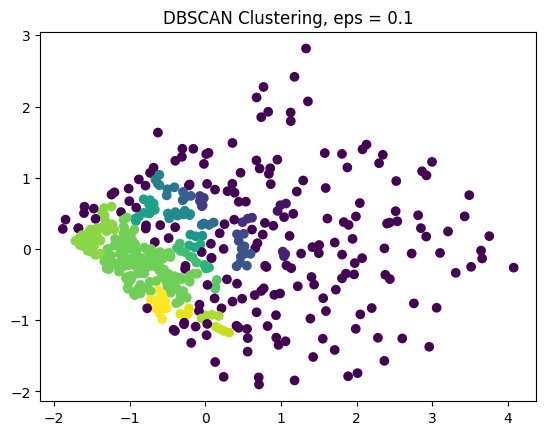

In [39]:
from sklearn.cluster import DBSCAN

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [40]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

score = []
for k in range(2,11):
  model_for_cluster = AgglomerativeClustering(n_clusters=k,linkage='average')

  model_for_cluster.fit(X)

  score.append(davies_bouldin_score(X, model_for_cluster.labels_))
print(f"Оптимальное число кластеров по метрике Davies Bouldin {score.index(min(score)) + 2}, с баллом {min(score)}")

Оптимальное число кластеров по метрике Davies Bouldin 3, с баллом 0.7257433369382245


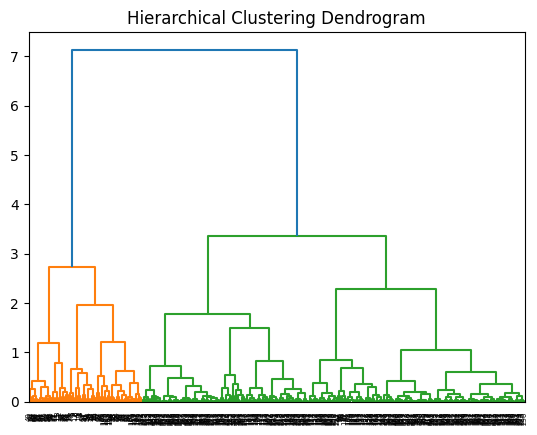

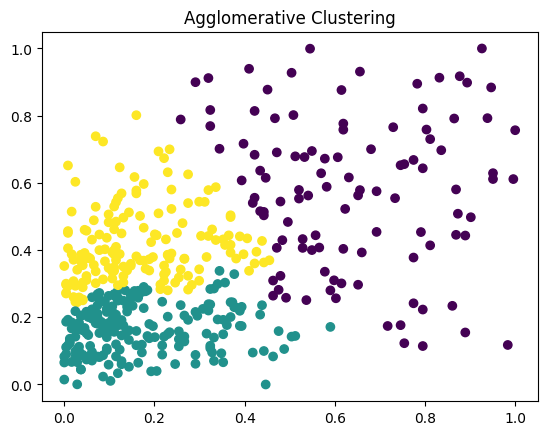

In [41]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(df_cluster['subscribers'], df_cluster['video views'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

Text(0.5, 1.0, 'PCA')

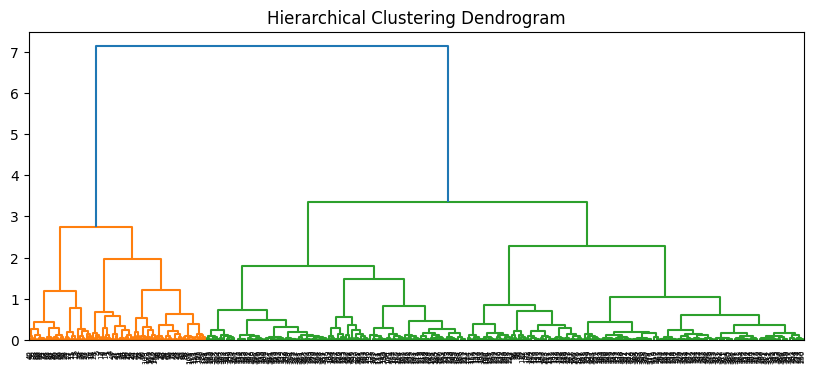

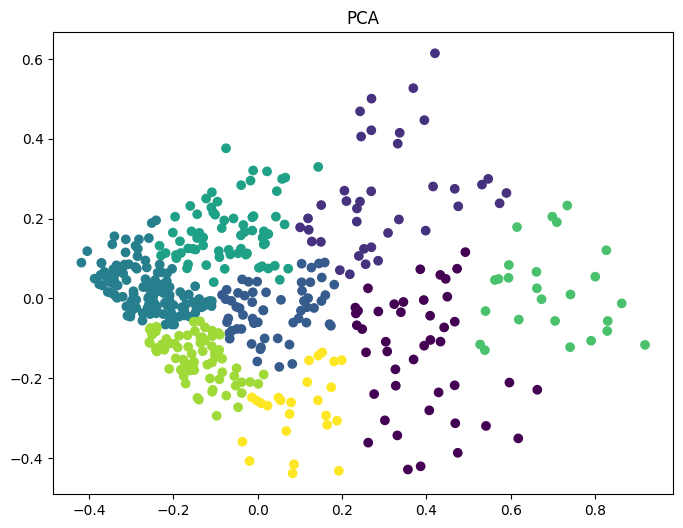

In [42]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=8)
agg_clustering.fit(data_pca)

plt.figure(figsize=(10, 4))
linkage_matrix = hierarchy.linkage(data_pca, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('PCA')

In [43]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here